In [1]:
import pandas as pd
!pip install numpy pandas
!pip install openpyxl #attribute to install excel reading
%pip install matplotlib seaborn plotly seaborn yfinance statsmodel.api
%pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pandas import to_datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#attribute'

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel.api (from versions: none)
ERROR: No matching distribution found for statsmodel.api

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#reading in all the cleaned dataframes

Inflation_diff = pd.read_csv('Inflation_diff.csv')
Interest_diff = pd.read_csv('Interest_diff.csv')
Current_account_diff = pd.read_csv('Current_account_diff.csv')
swaps_df = pd.read_csv('merged_df_month_year.csv')

In [3]:
#now run the regressiosn since all the data is ready, explore !!!!!

In [4]:
#checking if the dataframes have the same number of rows
print(f"Inflation_diff rows: {len(Inflation_diff)}")
print(f"Interest_diff rows: {len(Interest_diff)}")
print(f"Current_account_diff rows: {len(Current_account_diff)}")
print(f"swaps_df rows: {len(swaps_df)}")


Inflation_diff rows: 235
Interest_diff rows: 235
Current_account_diff rows: 235
swaps_df rows: 235


In [5]:
#lets check the first and last dates
print(f"Inflation_diff first date: {Inflation_diff['Date'].min()}")
print(f"Inflation_diff last date: {Inflation_diff['Date'].max()}")
print(f"Interest_diff first date: {Interest_diff['Date'].min()}")
print(f"Interest_diff last date: {Interest_diff['Date'].max()}")
print(f"Current_account_diff first date: {Current_account_diff['Date'].min()}")
print(f"Current_account_diff last date: {Current_account_diff['Date'].max()}")
print(f"swaps_df first date: {swaps_df['month-year'].min()}")
print(f"swaps_df last date: {swaps_df['month-year'].max()}")
#now we see that the swaps_df has dates, lets change it to month_year format. 

Inflation_diff first date: 2006-01
Inflation_diff last date: 2025-07
Interest_diff first date: 2006-01
Interest_diff last date: 2025-07
Current_account_diff first date: 2006-01
Current_account_diff last date: 2025-07
swaps_df first date: 2006-01
swaps_df last date: 2025-07


In [6]:
#lets create a function to divide the dataframe into train and test sets, based on the date
def train_test_split_by_date(df, date_column, test_size=0.05):
    """
    Splits the dataframe into train and test sets based on the date.
    
    Parameters:
    df (DataFrame): The dataframe to split.
    date_column (str): The name of the date column.
    test_size (float): The proportion of the dataset to include in the test split.
    
    Returns:
    DataFrame: Train set.
    DataFrame: Test set.
    """
    df[date_column] = pd.to_datetime(df[date_column])
    cutoff_date = df[date_column].quantile(1 - test_size)
    
    train_set = df[df[date_column] < cutoff_date]
    test_set = df[df[date_column] >= cutoff_date]
    
    return train_set, test_set

train_test_split_by_date(Inflation_diff, 'Date')
train_set_inflation, test_set_inflation = train_test_split_by_date(Inflation_diff, 'Date')

train_test_split_by_date(Interest_diff, 'Date')
train_set_interest, test_set_interest = train_test_split_by_date(Interest_diff, 'Date')
train_test_split_by_date(Current_account_diff, 'Date')
train_set_current, test_set_current = train_test_split_by_date(Current_account_diff, 'Date')
train_test_split_by_date(swaps_df, 'month-year')
train_set_swaps, test_set_swaps = train_test_split_by_date(swaps_df, 'month-year')


poor fitting to test values, lets figure out our next steps

In [7]:
#train_test_split by timeseries, without any differencing methods

X1_inflation_train = train_set_inflation['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_train = train_set_interest['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_train = train_set_current['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X_inflation_interest_current_train = np.hstack((X1_inflation_train, X2_interest_train, X3_current_account_train))
#test_values 
X1_inflation_test = test_set_inflation['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_test = test_set_interest['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_test = test_set_current['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
# Combine the independent variables into a single 2D array
X_inflation_interest_current_test = np.hstack((X1_inflation_test, X2_interest_test, X3_current_account_test))



model_USDJPY = LinearRegression()
model_USDJPY.fit(X_inflation_interest_current_train, train_set_swaps['USDJPY_20Y'])

Y_pred_USDJPY = model_USDJPY.predict(X_inflation_interest_current_train)
# Now we can evaluate the model
print(model_USDJPY.score(X_inflation_interest_current_train, train_set_swaps['USDJPY_20Y']))
print(model_USDJPY.score(X_inflation_interest_current_test, test_set_swaps['USDJPY_20Y']))




0.5267068895937863
-34.96363201083281


In [8]:
#train_test_split by timeseries, with pct differencing methods for swaps
#now lets try to convert the exchange rate data by returns, itll allow for stationary data
Y_train_USDJPY_pct = train_set_swaps['USDJPY_20Y'].pct_change()
Y_train_USDJPY_pct = Y_train_USDJPY_pct.fillna(0)  # Fill NaN values with 0

Y_test_USDJPY_pct = test_set_swaps['USDJPY_20Y'].pct_change()
Y_test_USDJPY_pct = Y_test_USDJPY_pct.fillna(0)

print(Y_train_USDJPY_pct.head())

#fitting the data

model_USDJPY = LinearRegression()
model_USDJPY.fit(X_inflation_interest_current_train, Y_train_USDJPY_pct)

Y_pred_USDJPY = model_USDJPY.predict(X_inflation_interest_current_train)
# Now we can evaluate the model
print(model_USDJPY.score(X_inflation_interest_current_train, Y_train_USDJPY_pct))
print(model_USDJPY.score(X_inflation_interest_current_test, Y_test_USDJPY_pct))


0    0.000000
1    0.020351
2   -0.004656
3   -0.003106
4   -0.043918
Name: USDJPY_20Y, dtype: float64
0.03250458181364613
0.03447962152024031


In [9]:
print(X_inflation_interest_current_train)

[[ 4.49  4.29 -9.3 ]
 [ 4.49  4.49 -9.3 ]
 [ 4.59  4.59 -9.3 ]
 [ 4.79  4.79 -9.3 ]
 [ 4.94  4.94 -9.3 ]
 [ 4.99  4.99 -9.38]
 [ 4.99  4.99 -9.38]
 [ 5.    5.   -9.38]
 [ 5.    5.   -9.67]
 [ 5.    5.   -9.67]
 [ 5.    5.   -9.67]
 [ 4.99  4.99 -9.54]
 [ 5.    5.   -9.54]
 [ 4.76  4.76 -9.54]
 [ 4.76  4.76 -9.75]
 [ 4.75  4.75 -9.75]
 [ 4.75  4.75 -9.75]
 [ 4.75  4.75 -9.84]
 [ 4.76  4.76 -9.84]
 [ 4.52  4.52 -9.84]
 [ 4.44  4.44 -9.73]
 [ 4.26  4.26 -9.73]
 [ 3.99  3.99 -9.73]
 [ 3.74  3.74 -9.52]
 [ 3.44  3.44 -9.52]
 [ 2.48  2.48 -9.52]
 [ 2.11  2.11 -9.31]
 [ 1.78  1.78 -9.31]
 [ 1.48  1.48 -9.31]
 [ 1.5   1.5  -8.78]
 [ 1.51  1.51 -8.78]
 [ 1.5   1.5  -8.78]
 [ 1.31  1.31 -8.24]
 [ 0.67  0.67 -8.24]
 [ 0.09  0.09 -8.24]
 [ 0.06  0.06 -7.57]
 [ 0.05  0.05 -7.57]
 [ 0.12  0.12 -7.57]
 [ 0.08  0.08 -6.28]
 [ 0.05  0.05 -6.28]
 [ 0.08  0.08 -6.28]
 [ 0.11  0.11 -5.69]
 [ 0.06  0.06 -5.69]
 [ 0.06  0.06 -5.69]
 [ 0.05  0.05 -5.25]
 [ 0.02  0.02 -5.25]
 [ 0.02  0.02 -5.25]
 [ 0.02  0.02

In [10]:
# train_test_split by timeseries, with pct differencing methods for swaps, and then apply differencing to the independent variables
#copy the indepdent variables to a new df
Current_account_diff_imp3 = Current_account_diff.copy()
Inflation_diff_imp3 = Inflation_diff.copy()
Interest_diff_imp3 = Interest_diff.copy()

# Now we can apply differencing to the independent variables
Current_account_diff_imp3['USDJPY'] = Current_account_diff_imp3['USDJPY'].diff().fillna(0)
Inflation_diff_imp3['USDJPY'] = Inflation_diff_imp3['USDJPY'].diff().fillna(0)
Interest_diff_imp3['USDJPY'] = Interest_diff_imp3['USDJPY'].diff().fillna(0)

#split into trainign and test_set_current
train_set_current_diff_imp3, test_set_current_diff_imp3 = train_test_split_by_date(Current_account_diff_imp3, 'Date')
train_set_inflation_diff_imp3, test_set_inflation_diff_imp3 = train_test_split_by_date(Inflation_diff_imp3, 'Date')
train_set_interest_diff_imp3, test_set_interest_diff_imp3 = train_test_split_by_date(Interest_diff_imp3, 'Date')

# Now we can create the independent variables for the model
X1_inflation_diff_imp3_train = train_set_inflation_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_diff_imp3_train = train_set_interest_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_diff_imp3_train = train_set_current_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X_inflation_interest_current_diff_imp3_train = np.hstack((X1_inflation_diff_imp3_train, X2_interest_diff_imp3_train, X3_current_account_diff_imp3_train))
#test values
X1_inflation_diff_imp3_test = test_set_inflation_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_diff_imp3_test = test_set_interest_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_diff_imp3_test = test_set_current_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
# Combine the independent variables into a single 2D array
X_inflation_interest_current_diff_imp3_test = np.hstack((X1_inflation_diff_imp3_test, X2_interest_diff_imp3_test, X3_current_account_diff_imp3_test))
#fitting the data
model_USDJPY_diff_imp3 = LinearRegression()
model_USDJPY_diff_imp3.fit(X_inflation_interest_current_diff_imp3_train, Y_train_USDJPY_pct)
Y_pred_USDJPY_diff_imp3_test= model_USDJPY_diff_imp3.predict(X_inflation_interest_current_diff_imp3_test) #wrong code, need to find the predicted returns for my  test set
Y_pred_USDJPY_diff_imp3_train = model_USDJPY_diff_imp3.predict(X_inflation_interest_current_diff_imp3_train) 
# Now we can evaluate the model
print(model_USDJPY_diff_imp3.score(X_inflation_interest_current_diff_imp3_train, Y_train_USDJPY_pct))
print(model_USDJPY_diff_imp3.score(X_inflation_interest_current_diff_imp3_test, Y_test_USDJPY_pct))



0.037191798032766954
-0.18253713110304504


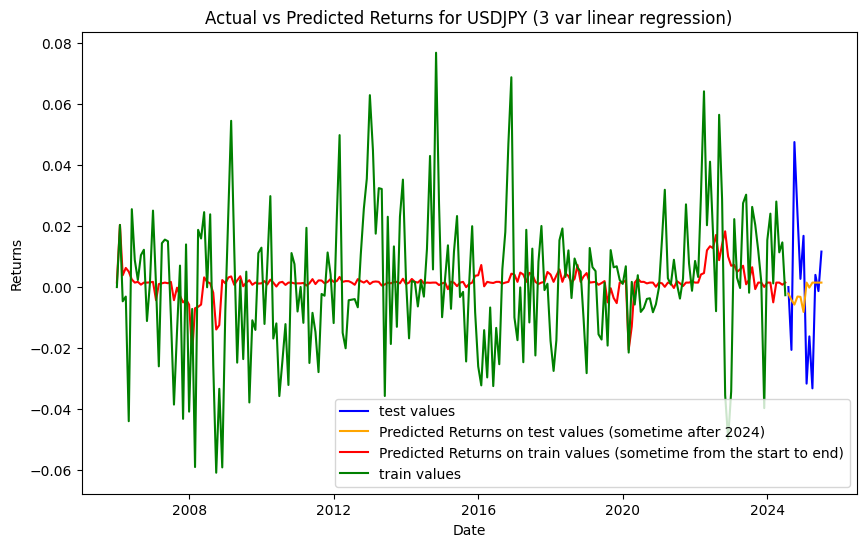

In [11]:
#lets plot the results for implementation three
plt.figure(figsize=(10, 6))
plt.plot(test_set_swaps['month-year'], Y_test_USDJPY_pct, label='test values', color='blue')
plt.plot(test_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3_test, label='Predicted Returns on test values (sometime after 2024)', color='orange')
plt.plot(train_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3_train, label = 'Predicted Returns on train values (sometime from the start to end)', color = 'red')
plt.plot(train_set_swaps['month-year'],Y_train_USDJPY_pct, label='train values', color='green')
#plt.plot(train_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3, label='Predicted Returns', color='orange')
plt.title('Actual vs Predicted Returns for USDJPY (3 var linear regression)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [12]:
#from the above visualization, we can see that the model tends closer to the mean returns, some possible reasons may include
'''

Linear Model Limitation:
Linear regression predicts the average effect of features. If your train data is highly volatile or non-linear, the model will smooth out predictions and miss spikes.

Low Feature Correlation:
Your independent variables may not be strongly correlated with the target, so the model predicts values close to the mean.

Multicollinearity:
If your features are highly correlated with each other, the model coefficients may be unstable, reducing predictive accuracy.

Data Leakage or Misalignment:
If your features and target are not properly aligned (e.g., shifted by one period, mismatched dates), the model cannot learn the true relationship.

Incorrect Preprocessing:
Issues like improper differencing, scaling, or filling NaNs can distort the relationship between features and target.

Over-regularization:
If you use regularization (e.g., Ridge/Lasso), it can shrink coefficients too much, causing predictions to be flat.

Insufficient Model Complexity:
Real-world financial data often requires more complex models (e.g., tree-based, neural networks, time series models) to capture volatility and patterns.
'''

'\n\nLinear Model Limitation:\nLinear regression predicts the average effect of features. If your train data is highly volatile or non-linear, the model will smooth out predictions and miss spikes.\n\nLow Feature Correlation:\nYour independent variables may not be strongly correlated with the target, so the model predicts values close to the mean.\n\nMulticollinearity:\nIf your features are highly correlated with each other, the model coefficients may be unstable, reducing predictive accuracy.\n\nData Leakage or Misalignment:\nIf your features and target are not properly aligned (e.g., shifted by one period, mismatched dates), the model cannot learn the true relationship.\n\nIncorrect Preprocessing:\nIssues like improper differencing, scaling, or filling NaNs can distort the relationship between features and target.\n\nOver-regularization:\nIf you use regularization (e.g., Ridge/Lasso), it can shrink coefficients too much, causing predictions to be flat.\n\nInsufficient Model Complexit

In [13]:
#try other models more fitted to financial returns, lets try polynomial regression


In [14]:
X_train = X_inflation_interest_current_diff_imp3_train
X_test = X_inflation_interest_current_diff_imp3_test

Y_train= Y_train_USDJPY_pct
Y_test = Y_test_USDJPY_pct
poly = PolynomialFeatures(degree=4) # You can adjust the degree as needed
X_poly_train= poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
#fitting the model_USDJPY
model_poly = LinearRegression()
model_poly.fit(X_poly_train, Y_train)
#predicted for both test and train values
y_pred_train = model_poly.predict(X_poly_train)
y_pred_test = model_poly.predict(X_poly_test)  
#model scores
print(model_poly.score(X_poly_train, Y_train))
print(model_poly.score(X_poly_test, Y_test))


0.15765818626543782
-0.47762786869266494


                            OLS Regression Results                            
Dep. Variable:             USDJPY_20Y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.820
Date:                Wed, 13 Aug 2025   Prob (F-statistic):             0.0399
Time:                        13:55:02   Log-Likelihood:                 532.85
No. Observations:                 223   AIC:                            -1058.
Df Residuals:                     219   BIC:                            -1044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.002      0.979      0.3

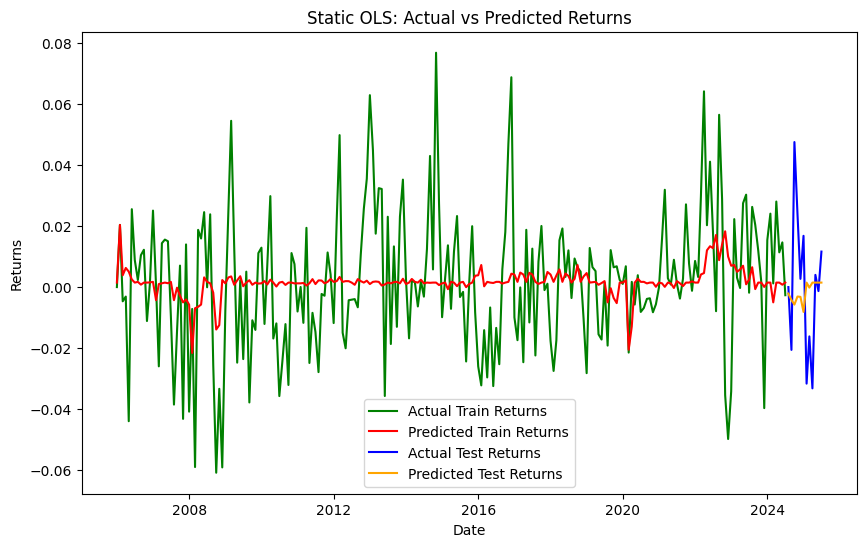

In [15]:
import statsmodels.api as sm

# 1. Prepare your factors and target
X = X_inflation_interest_current_diff_imp3_train  # shape: (n_samples, 3)
Y = Y_train_USDJPY_pct  # shape: (n_samples,)

# 2. Add constant (intercept) to factors
X_const = sm.add_constant(X)

# 3. Fit static OLS regression
model_ols = sm.OLS(Y, X_const).fit()

# 4. Print summary for interpretation
print(model_ols.summary())

# 5. Predict on train and test sets
Y_pred_train = model_ols.predict(sm.add_constant(X_inflation_interest_current_diff_imp3_train))
Y_pred_test = model_ols.predict(sm.add_constant(X_inflation_interest_current_diff_imp3_test))

# 6. Plot actual vs predicted returns
plt.figure(figsize=(10, 6))
plt.plot(train_set_swaps['month-year'], Y_train_USDJPY_pct, label='Actual Train Returns', color='green')
plt.plot(train_set_swaps['month-year'], Y_pred_train, label='Predicted Train Returns', color='red')
plt.plot(test_set_swaps['month-year'], Y_test_USDJPY_pct, label='Actual Test Returns', color='blue')
plt.plot(test_set_swaps['month-year'], Y_pred_test, label='Predicted Test Returns', color='orange')
plt.title('Static OLS: Actual vs Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

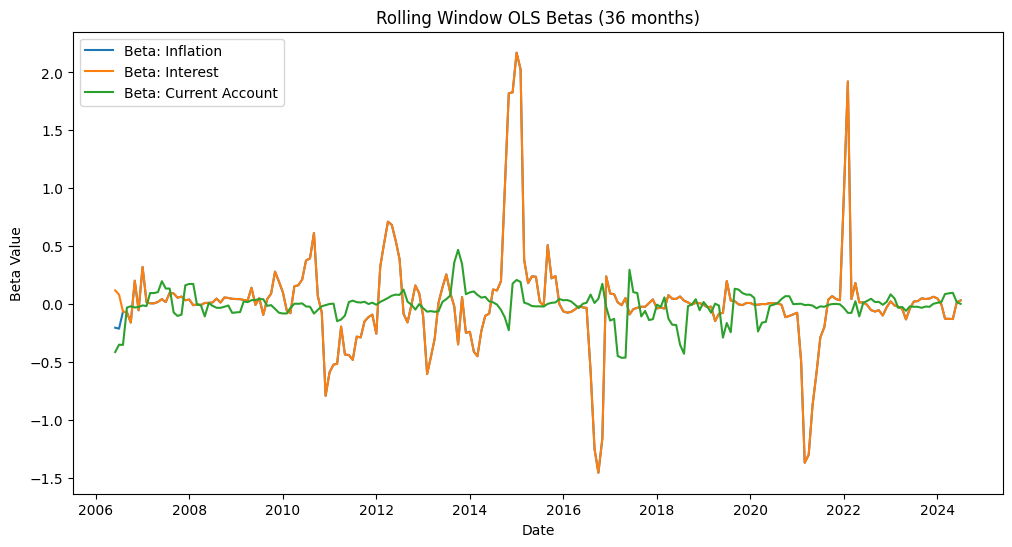

In [ ]:
import statsmodels.api as sm

window = 6 # rolling window size (months)
betas = []
dates = []

X = X_inflation_interest_current_diff_imp3_train
Y = Y_train_USDJPY_pct
date_index = train_set_swaps['month-year'].reset_index(drop=True)

for start in range(len(X) - window + 1):
    end = start + window
    X_window = X[start:end]
    Y_window = Y[start:end]
    X_window_const = sm.add_constant(X_window)
    model = sm.OLS(Y_window, X_window_const).fit()
    betas.append(model.params.values)
    dates.append(date_index[end-1])

betas = np.array(betas)
dates = np.array(dates)

# Plot time-varying betas
plt.figure(figsize=(12, 6))
plt.plot(dates, betas[:, 1], label='Beta: Inflation')
plt.plot(dates, betas[:, 2], label='Beta: Interest')
plt.plot(dates, betas[:, 3], label='Beta: Current Account')
plt.title('Rolling Window OLS Betas (36 months)')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()

In [24]:
print(betas[:, 1])

# Print each beta coefficient for inflation, interest, and current account

[-0.0666735  -0.06853455  0.01992971  0.0218188   0.02329873  0.02623342
  0.02477741  0.02385608  0.02398529  0.02215279  0.02125604  0.02112628
  0.02172225  0.02110783  0.02098453  0.02268347  0.02356096  0.02232495
  0.02137312  0.02042178  0.018844    0.01874098  0.0181545   0.017441
  0.01885931  0.01732499  0.03144543  0.02523558  0.0321398   0.03841413
  0.03708532  0.03681857  0.03502831  0.03403131  0.02483131  0.06494531
  0.04073548  0.03840096 -0.00407638  0.08912051  0.10794664  0.1219355
  0.12772528  0.11469448  0.10412681  0.08956845  0.09830662  0.09584304
  0.09824735  0.04219279  0.07148994  0.04585926  0.00458043 -0.05211331
 -0.0269352  -0.01878133  0.00539776  0.00951581  0.00455262 -0.00255754
  0.0097499   0.00726715  0.00229665 -0.01885675  0.00884567 -0.00628417
 -0.01446351 -0.03226887  0.03063575  0.00271282 -0.00391616  0.00091256
  0.04223613  0.07020532  0.06041057 -0.01392091 -0.00784233  0.04336764
  0.05031551  0.05037412  0.00045147  0.03361788  0.05

In [25]:
print(betas[:, 2])

[ 0.10471846  0.10613351  0.01992971  0.0218188   0.02329873  0.02623342
  0.02477741  0.02385608  0.02398529  0.02215279  0.02125604  0.02112628
  0.02172225  0.02110783  0.02098453  0.02268347  0.02356096  0.02232495
  0.02137312  0.02042178  0.018844    0.01874098  0.0181545   0.017441
  0.01885931  0.01732499  0.03144543  0.02523558  0.0321398   0.03841413
  0.03708532  0.03681857  0.03502831  0.03403131  0.02483131  0.06494531
  0.04073548  0.03840096 -0.00407638  0.08912051  0.10794664  0.1219355
  0.12772528  0.11469448  0.10412681  0.08956845  0.09830662  0.09584304
  0.09824735  0.04219279  0.07148994  0.04585926  0.00458043 -0.05211331
 -0.0269352  -0.01878133  0.00539776  0.00951581  0.00455262 -0.00255754
  0.0097499   0.00726715  0.00229665 -0.01885675  0.00884567 -0.00628417
 -0.01446351 -0.03226887  0.03063575  0.00271282 -0.00391616  0.00091256
  0.04223613  0.07020532  0.06041057 -0.01392091 -0.00784233  0.04336764
  0.05031551  0.05037412  0.00045147  0.03361788  0.05

In [26]:
print(betas[:, 3])  

[-0.03232396 -0.03203109 -0.03288526  0.01081574  0.00990792  0.00891863
  0.0092451   0.01043952  0.01030683  0.00791944  0.00905653  0.00921109
  0.00777418  0.0083392   0.00928376  0.00410986  0.00359429  0.00476262
  0.00674731  0.00755384  0.00756112  0.00821728  0.00931605  0.00828704
  0.00701126  0.00655798  0.0074796   0.00854577  0.00894254  0.01038475
  0.00652189  0.00677876  0.00788744  0.00940699  0.00893675  0.01026917
  0.01980639  0.01984168  0.01839177  0.00704265  0.00789391  0.0077344
  0.00902434  0.00861586  0.00846121  0.01442206  0.01427159  0.01339203
  0.0192044   0.0170484   0.01584493  0.02296135  0.0231213   0.02147938
  0.02284246  0.01913432  0.01857099  0.01518642  0.0137249   0.01285599
  0.01962153  0.01876424  0.02028871  0.01900963  0.01990197  0.01857673
  0.02431182  0.02357896  0.01884305  0.02200068  0.02152421  0.01577716
  0.00712198  0.00667     0.00748292 -0.00418763 -0.00422492 -0.00425102
 -0.00480493 -0.00480284 -0.00529381  0.00726592  0.

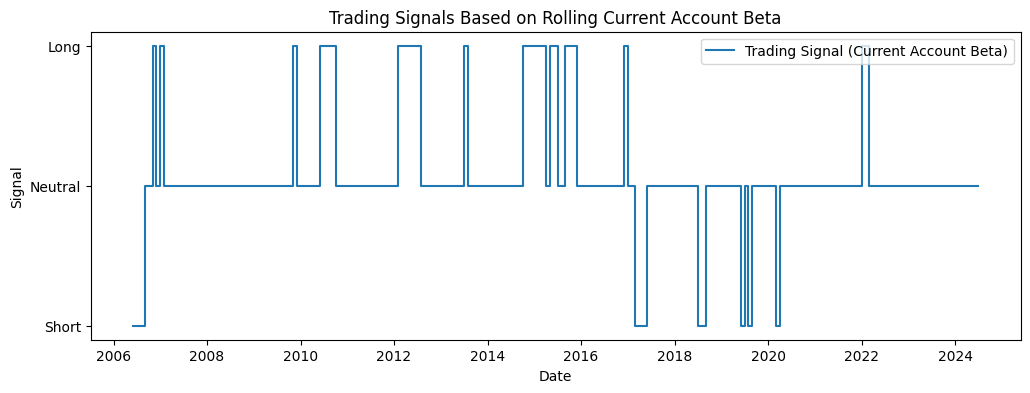

In [29]:
# Example: Generate trading signals based on rolling betas for the current account

# 1. Set a threshold for signal generation (e.g., beta < -0.2 for short, beta > 0.2 for long)
long_threshold = 0.2
short_threshold = -0.2

# 2. Generate signals: 1 for long, -1 for short, 0 for neutral
signals = np.where(betas[:, 2] > long_threshold, 1, 
                   np.where(betas[:, 3] < short_threshold, -1, 0))

# 3. Plot signals over time
plt.figure(figsize=(12, 4))
plt.plot(dates, signals, drawstyle='steps-post', label='Trading Signal (Current Account Beta)')
plt.title('Trading Signals Based on Rolling Current Account Beta')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.yticks([-1, 0, 1], ['Short', 'Neutral', 'Long'])
plt.legend()
plt.show()

# 4. (Optional) You can apply this logic to other betas or combine signals for multi-factor strategies.